Logistic model for outcome of fight

In [628]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [629]:
df = pd.read_csv('../CSV Files/df_ufc_masters_w_reversed.csv')

In [630]:
df.filter(regex='^B')

,B_fighter,B_odds,B_ev,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,...,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age,B_match_weightclass_rank,B_Pound-for-Pound_rank,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch
0,Johnny Walker,0.434783,130.000000,0,1,0,3.420000,0.590000,0.700000,0.240000,...,198.12,208.28,205,29,10.0,NaN,0.0,1.0,0.0,0.0
1,Niko Price,0.666667,50.000000,2,0,0,5.160000,0.420000,0.800000,0.790000,...,182.88,193.04,170,32,NaN,NaN,0.0,1.0,0.0,0.0
2,Krzysztof Jotko,0.565217,76.923077,1,0,0,2.920000,0.410000,0.100000,1.150000,...,185.42,195.58,185,32,NaN,NaN,0.0,0.0,1.0,0.0
3,Mike Breeden,0.173913,475.000000,1,0,0,4.040000,0.340000,0.000000,0.000000,...,177.80,177.80,155,32,NaN,NaN,0.0,1.0,0.0,0.0
4,Jared Gordon,0.465116,115.000000,0,2,0,5.220000,0.560000,0.000000,2.540000,...,175.26,172.72,145,33,NaN,NaN,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9783,Duane Ludwig,0.607843,64.516129,1,0,0,13.666667,0.576667,0.000000,0.000000,...,177.80,177.80,170,31,NaN,NaN,0.0,1.0,0.0,0.0
9784,John Howard,0.677419,47.619048,0,3,0,18.000000,0.550000,1.000000,4.666667,...,170.18,180.34,170,27,NaN,NaN,0.0,1.0,0.0,0.0
9785,Brendan Schaub,0.722222,38.461538,1,0,0,12.000000,0.250000,0.000000,0.000000,...,193.04,198.12,245,27,NaN,NaN,0.0,1.0,0.0,0.0
9786,Mike Pierce,0.807692,23.809524,1,0,0,40.500000,0.405000,0.000000,3.500000,...,172.72,177.80,170,29,NaN,NaN,0.0,1.0,0.0,0.0


array([[<Axes: title={'center': 'R_age'}>,
        <Axes: title={'center': 'B_age'}>],
       [<Axes: title={'center': 'B_current_lose_streak'}>,
        <Axes: title={'center': 'B_current_win_streak'}>],
       [<Axes: title={'center': 'R_current_lose_streak'}>,
        <Axes: title={'center': 'R_current_win_streak'}>]], dtype=object)

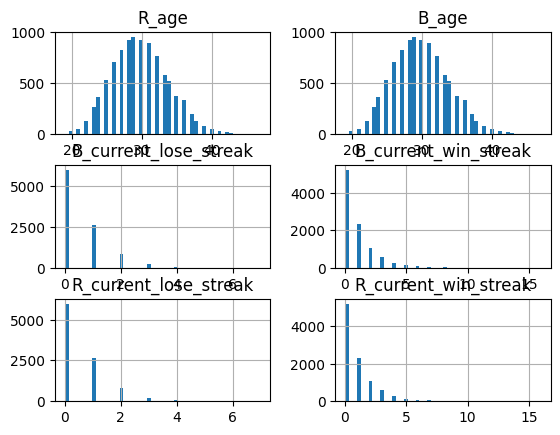

In [631]:
columns = ['R_age', 'B_age', 'B_current_lose_streak', 'B_current_win_streak',
            'R_current_lose_streak', 'R_current_win_streak']
df[columns].hist(bins=50)

In [632]:
features = [
    'B_avg_SIG_STR_landed',
    'B_avg_SIG_STR_pct',
    'B_avg_SUB_ATT',
    'B_avg_TD_landed',
    'B_avg_TD_pct',
    'R_avg_SIG_STR_landed',
    'R_avg_SIG_STR_pct',
    'R_avg_SUB_ATT',
    'R_avg_TD_landed',
    'R_avg_TD_pct',
    'B_Height_cms',
    'B_Reach_cms',
    'R_Height_cms',
    'R_Reach_cms', 
    'R_age',
    'B_age'
]

# List of columns to apply np.log
columns_to_log = ['B_avg_SIG_STR_landed', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 
                  'R_avg_SIG_STR_landed', 'R_avg_SUB_ATT', 'R_avg_TD_landed']

# Applying np.log to each column in the list
for col in columns_to_log:
    # Adding a small constant to avoid log(0) which is undefined
    df[col] = np.log(df[col] + 1e-5)


In [633]:
X =df[features]
y= df['Winner']

In [634]:
y_encoded = y.apply(lambda x: 1 if x == 'Red' else 0)

In [635]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [636]:
sScaler = StandardScaler()
X_train_scaled = sScaler.fit_transform(X_train)
X_test_scaled = sScaler.transform(X_test)

In [637]:
model_lin = LogisticRegression()
model_lin.fit(X_train_scaled, y_train)

LogisticRegression()

In [638]:
y_pred_percent= model_lin.predict_proba(X_train_scaled)

In [639]:
#y_pred_percent = y_pred_proba * 100
y_pred_percent[:5]

array([[0.37910931, 0.62089069],
       [0.39929001, 0.60070999],
       [0.44892007, 0.55107993],
       [0.55890412, 0.44109588],
       [0.54751924, 0.45248076]])

In [640]:
y_pred_proba_df = pd.DataFrame(y_pred_percent, columns=['Probability_Blue', 'Probability_Red'])

In [641]:
y_encoded_df = y_encoded.to_frame()
result_df = pd.concat([df, y_pred_proba_df], axis=1)

In [642]:
result_df.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_Stance_Switch',
       'Winner_Blue', 'Winner_Red', 'better_rank_Blue', 'better_rank_Red',
       'better_rank_neither', 'Probability_Blue', 'Probability_Red'],
      dtype='object', length=110)

In [643]:
result_df=result_df[['R_fighter', 'B_fighter', 'Winner', 'R_odds', 'B_odds','R_ev', 'B_ev', 'Probability_Blue', 'Probability_Red']].copy()

In [644]:
result_df['blue_difference'] = (result_df['Probability_Blue'] - result_df['B_odds'])
result_df['red_difference'] = (result_df['Probability_Red'] - result_df['R_odds'])
result_df=result_df.dropna()

In [645]:
result_df.columns

Index(['R_fighter', 'B_fighter', 'Winner', 'R_odds', 'B_odds', 'R_ev', 'B_ev',
       'Probability_Blue', 'Probability_Red', 'blue_difference',
       'red_difference'],
      dtype='object')

In [656]:
condition_blue = ((result_df['B_ev'] * result_df['Probability_Blue']) > 100)
condition_red = ((result_df['R_ev'] * result_df['Probability_Red']) > 100)
condition_blue.sum()

1668

In [655]:
bank=0
for index, row in result_df.iterrows():
    # Check if the condition for betting on blue is True
    if condition_blue[index]:
        # Simulate the bet
        bet_amount = 1  # You can adjust the bet amount based on your strategy
        
        # Check if blue won
        if row['Winner'] == 'Blue':
            # Add the B_ev to the bank
            bank +=1
            #bank += row['B_ev'] * (bet_amount / 100)
        else:
            # Subtract the bet amount from the bank
            bank -= bet_amount
print(bank)

-1309


In [648]:
y_pred_train = model_lin.predict(X_train_scaled)
y_pred_test = model_lin.predict(X_test_scaled)

In [649]:
accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5761
Confusion Matrix:
 [[570 395]
 [435 558]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58       965
           1       0.59      0.56      0.57       993

    accuracy                           0.58      1958
   macro avg       0.58      0.58      0.58      1958
weighted avg       0.58      0.58      0.58      1958



Train accuracy: 0.5780332056194125
Train precsision: 0.5766760852812741
Train recall: 0.5754934632145604


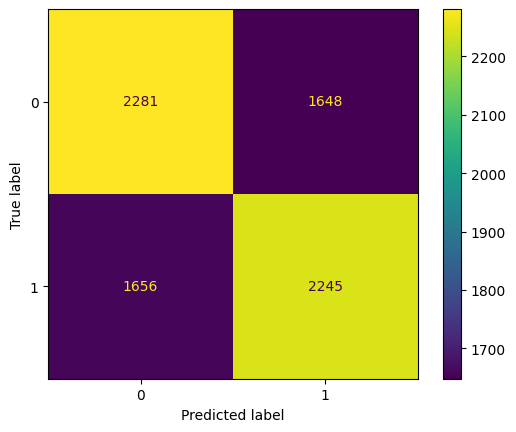

In [650]:
acc_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(cm_train).plot()
tn = cm_train[0,0]
fp = cm_train[0,1]
fn = cm_train[1,0]
tp = cm_train[1,1]
precision = tp/(fp+tp)
recall = tp/(tp+fn)

print(f'Train accuracy: {acc_train}')
print(f'Train precsision: {precision}')
print(f'Train recall: {recall}')

Test accuracy: 0.5760980592441267
Test precsision: 0.5855194123819517
Test recall: 0.5619335347432024


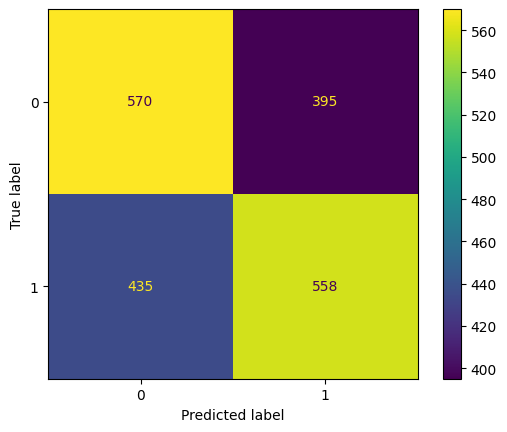

In [651]:
acc_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm_test).plot()
tn = cm_test[0,0]
fp = cm_test[0,1]
fn = cm_test[1,0]
tp = cm_test[1,1]
precision_test = tp/(fp+tp)
recall_test = tp/(tp+fn)

print(f'Test accuracy: {acc_test}')
print(f'Test precsision: {precision_test}')
print(f'Test recall: {recall_test}')